# SVD and it's application to image compression

In [3]:
# importing the required libraries
import os
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
import seaborn as sns
import Library.DIY as d

# #Example of SVD 

In [4]:
# finding the sigma matrix for square matrix of size 3
a = [[3,2,1],
     [0,2,1],
     [0,0,1]]
# calling the Svd function from library 
m,n,o = d.SVD(a)
print("The shape of the decomposed matrices is",[np.shape(x) for x in [m, np.diag(n), o]])

The shape of the decomposed matrices is [(3, 3), (3, 3), (3, 3)]


In [5]:
print("The eigen vector of AA^t is :\n ", m)

The eigen vector of AA^t is :
  [[ 0.9088179   0.41652613  0.02357989]
 [ 0.40826313 -0.87631164 -0.25573252]
 [ 0.08585595 -0.24204109  0.96645997]]


In [6]:
# cheking the orthogonality of the eigen vector of AA^t
print("The product of the eigen vector of AA^t and it's transpose is:\n ",d.matrix_product(m,d.transpose(m)))

The product of the eigen vector of AA^t and it's transpose is:
  [[1.0000000000000004, -5.724587470723463e-17, -6.938893903907228e-18], [-5.724587470723463e-17, 1.0000000000000004, 1.6653345369377348e-16], [-6.938893903907228e-18, 1.6653345369377348e-16, 0.9999999999999998]]


In [7]:
# cheking the orthogonality of the eigen vector of A^tA
print("The product of the eigen vector of A^tA and it's transpose is:\n ",d.matrix_product(o,d.transpose(o)))

The product of the eigen vector of A^tA and it's transpose is:
  [[0.9999999999999993, 8.326672684688674e-17, 5.551115123125783e-17], [8.326672684688674e-17, 0.9999999999999994, 0.0], [5.551115123125783e-17, 0.0, 0.9999999999999998]]


In [8]:
# checking the SVD of the matrix by multiply U,D,Vt explicitly
k = d.matrix_product(m,d.sigma_matrix(a))
r = d.matrix_product(k,(o))
print("By explicit multiplication the matrix is :\n",r)

By explicit multiplication the matrix is :
 [[2.999999999999999, 1.9999999999999996, 0.9999999999999999], [-5.551115123125783e-17, 2.0, 1.0], [-1.3877787807814457e-17, 0.0, 0.9999999999999996]]


# #finding the singular value matrix(diagonal matrix) of the given matrix  

# Case 1 : Rectangular matrix (m x n) where m > n

In [9]:
# define the matrix
X = [[1,2,3,],[2,3,4],[3,4,5],[4,5,6],[5,6,7]]   
# calling the SVD function from library
x,y,z = d.SVD(X)
# print("The shape of the decomposed matrices is",[np.shape(x) for x in [x, np.diag(y), z]])
print("The singular values are \n",y)


The singular values are 
 [1.67010311e+01 1.03709214e+00 3.62597321e-16]


In [10]:
# contruct sigma matrix()
print("The sigular matrix of the given matrix is:\n",d.sigma_matrix(X))

The sigular matrix of the given matrix is:
 [[1.67010311e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.03709214e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.62597321e-16]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]


# Case 2 : Rectangular matrix (m x n) where m < n

In [11]:
# define the matrix 
A = [[3,2,2,6],
     [2,3,-2,4]]
# calling the Svd function from library
m,n,o = d.SVD(A)
# print("The shape of the decomposed matrices is",[np.shape(x) for x in [m, np.diag(n), o]])
print("The singular values are \n",n)


The singular values are 
 [8.74792028 3.07796861]


In [12]:
# contruct sigma matrix()
print("The sigular matrix of the given matrix is:\n",d.sigma_matrix(A))

The sigular matrix of the given matrix is:
 [[8.74792028 0.         0.         0.        ]
 [0.         3.07796861 0.         0.        ]]


# # LOW RANK APPROXIMATION

In [13]:
# 2 rank approximation of the matrix
A = [[3,2,1],
     [0,2,1],
     [0,0,1]]
print("The rank of the given matrix is:",np.linalg.matrix_rank(A))
m,n,o = d.compress_matrix(2,A)
b = d.matrix_product(n,o)
a = d.matrix_product(m,b)
print("The low rank approximate matrix is :\n", a)
print("The rank of the low rank matrix is:", np.linalg.matrix_rank(a))

The rank of the given matrix is: 3
The low rank approximate matrix is :
 [[2.998331966829914, 2.01094826558766, 0.9826851162827595], [0.018090431551574637, 1.8812620439604806, 1.1877862648823934], [-0.06836704953321132, 0.44873245278216534, 0.29032135931806236]]
The rank of the low rank matrix is: 2


# # Application of SVD to image compression

# Case 1: Gray scale image compression using SVD

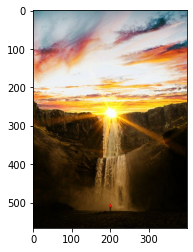

In [14]:
# reading the image
img = plt.imread("./Demo/SVDimg.jpeg")
plt.imshow(img)
plt.show()

In [15]:
# reading the image as a matrix
# print("The matrix of the image is: ",img)
print("The shape of the image is: ", img.shape)

The shape of the image is:  (566, 400, 3)


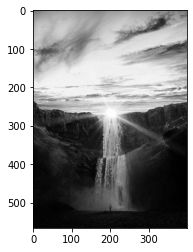

In [16]:
# converting the image to grayscale
b = np.asarray(pil.Image.fromarray((img).astype(np.uint8)).convert("L"))
plt.imshow(b,cmap="gray")


In [17]:
# printing the matrix of the image
#print("The matrix of the image is :\n", b)
#print("The shape of the image is: ", b.shape)

In [18]:
# calling the SVD function
U,D,Vt = d.SVD(b)
print("The shape of the decomposed matrices is",[np.shape(x) for x in [U, np.diag(D), Vt]])
# print("The singular values are \n",d.sigma_matrix(b))

The shape of the decomposed matrices is [(566, 566), (400, 400), (400, 400)]


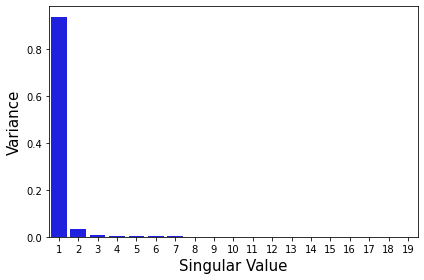

In [19]:
# plotting to see the contribution of different singular values
n = 20
sns.barplot(x = list(range(1,n)), y = d.variance(b)[0:n-1], color = "blue") # range(1,n) is used to plot the first n singular values
plt.xlabel("Singular Value",fontsize = 15)
plt.ylabel("Variance",fontsize = 15)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Reconstructed Image with 35 singular values')

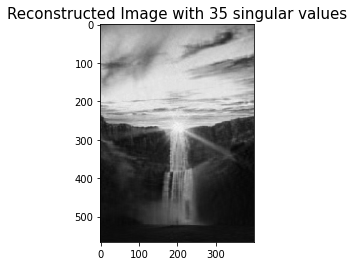

In [20]:
d.compress_grey(35,b)
num = 35
plt.title("Reconstructed Image with %s singular values" %num, fontsize = 15)
# plt.title("Storage = %s  " , fontsize = 15)

# 2. Colour image compression using SVD

The shape of the image matrix is (194, 259, 3)


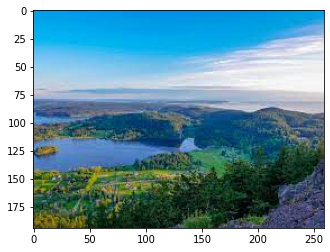

In [21]:
img = plt.imread("./Demo/SVDcom.jpg")
#plt.imshow(img)
print("The shape of the image matrix is",img.shape)
plt.imshow(img[:,:,:3])


In [22]:
# convert the colour(RGB) image into red image
red = img[:,:,0]
#print("The matrix of the image because of red channel is :\n", red)
#print("The shape of the matrix is :",red.shape)

In [23]:
# convert the colour(RGB) image into blue image
green = img[:,:,1]
#print("The matrix of the image because of green channel is :\n", green)
#print("The shape of the matrix is :",green.shape)

In [24]:
# convert the colour(RGB) image into blue image
blue = img[:,:,2]
#print("The matrix of the image because of blue channel is :\n", blue)
#print("The shape of the matrix is :",blue.shape)

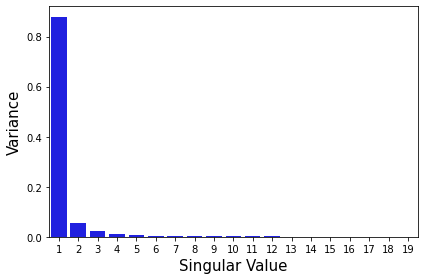

In [25]:
# plotting to see the contribution of different singular values for red channel
n = 20
sns.barplot(x = list(range(1,n)), y = d.variance(red)[0:n-1], color = "blue") # range(1,n) is used to plot the first n singular values
plt.xlabel("Singular Value",fontsize = 15)
plt.ylabel("Variance",fontsize = 15)
plt.tight_layout()
plt.show()

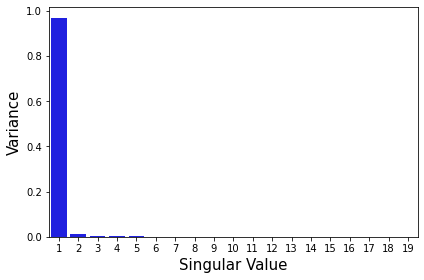

In [26]:
# plotting to see the contribution of different singular values for green channel
n = 20
sns.barplot(x = list(range(1,n)), y = d.variance(green)[0:n-1], color = "blue") # range(1,n) is used to plot the first n singular values
plt.xlabel("Singular Value",fontsize = 15)
plt.ylabel("Variance",fontsize = 15)
plt.tight_layout()
plt.show()

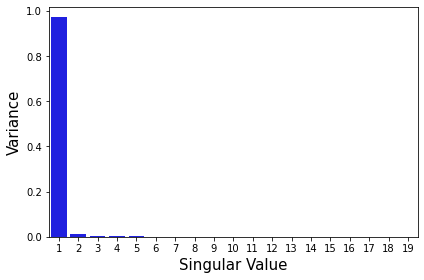

In [27]:
# plotting to see the contribution of different singular values for blue channel
n = 20
sns.barplot(x = list(range(1,n)), y = d.variance(blue)[0:n-1], color = "blue") # range(1,n) is used to plot the first n singular values
plt.xlabel("Singular Value",fontsize = 15)
plt.ylabel("Variance",fontsize = 15)
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


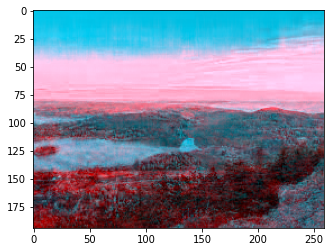

In [28]:
# when I use the inuilt matrix multiplication function of numpy to do low rank approximation
d.compress_color_1(135,red,green,blue)

In [35]:
# when I use my own matrix multiplication function to do low rank approximation
a = d.compress_color_2(35,red,green,blue)

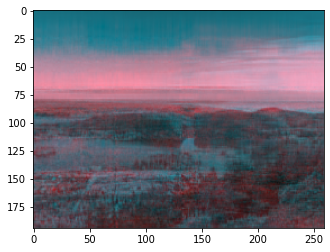

In [36]:
a = (a - a.min())/(a.max()-a.min())
plt.imshow((a*255).astype(np.uint8))